In [4]:

import numpy as np
from matplotlib import pyplot

import keras
from keras.utils import np_utils
from keras.datasets import mnist
# En caso de que no empleemos un dataset incluido por defecto en Keras: 
# from google.colab import drive
# drive.mount('/content/drive')
# https://stackoverflow.com/questions/59120853/google-colab-is-so-slow-while-reading-images-from-google-drive

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# TAMAÑO DE BATCH
batch_size = 128
# NÚMERO DE CLASES
num_classes = 10
# ÉPOCAS DE ENTRENAMIENTO
epochs = 20

# DIMENSIONES DE ENTRADA DE LAS IMAGENES
img_rows, img_cols = 28, 28

# CARGAMOS LOS DATOS DE ENTRENAMIENTO Y TEST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# FORMATEAMOS Y NORMALIZAMOS LOS DATOS
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Transformamos los vectores de clases en matrices.
# Cada componente se convierte en un vector de ceros
# con un uno en la componente correspondiente a la
# clase a la que pertenece la imagen. Este paso es
# necesario para la clasificación multiclase en keras.
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


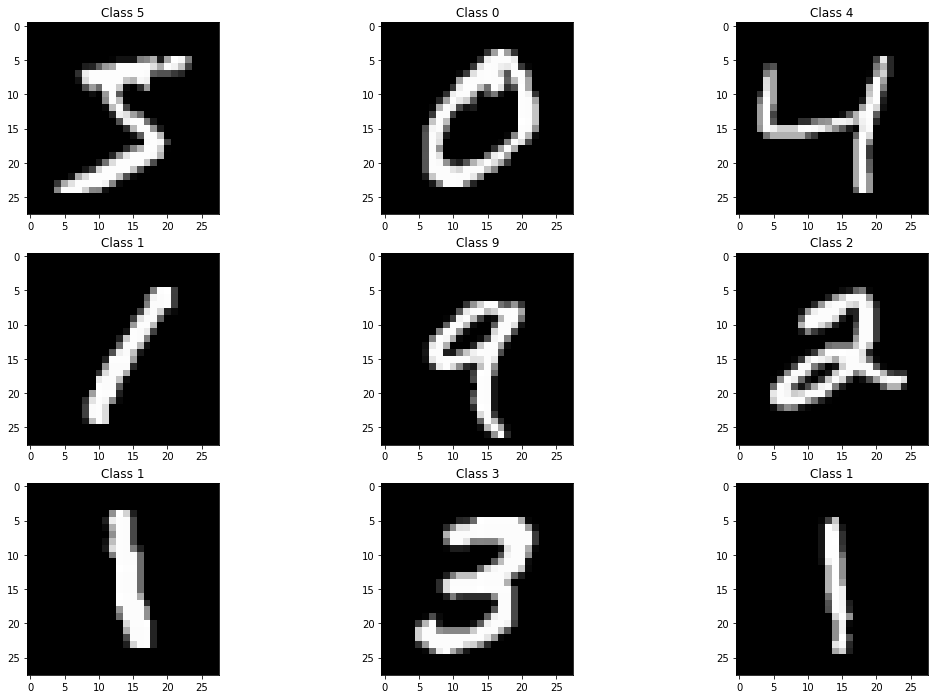

In [5]:
#VISUALIZAMOS ALGUNAS DE LAS IMÁGENES DEL DATASET
number_images_per_row = 3
result = np.where(y_train == 1)
fig = pyplot.figure()
for i in range(number_images_per_row*number_images_per_row):
  label = 'Class {}'.format(result[1][i])
  pyplot.subplot(number_images_per_row,number_images_per_row,i+1).set_title(label)
  pyplot.imshow(x_train[i].squeeze(), cmap='gray',vmin=0,vmax=1)

fig.set_size_inches(np.array(fig.get_size_inches()) * number_images_per_row)
pyplot.show()



In [6]:
# AQUI COMIENZA LA DESCRIPCION DEL MODELO DE RED NEURONAL QUE VAMOS A EMPLEAR
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# AQUI ACABA LA DESCRIPCION DEL MODELO

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                      

In [7]:
# AQUI DEFINIMOS EL OPTIMIZADOR, LA FUNCION DE PERDIDA, Y LA METRICA
import tensorflow as tf
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])



In [9]:
#ENTRENAMOS: https://keras.io/api/models/model_training_apis/
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.1)

# Vemos que el modelo se entrena por un determinado número de épocas (epochs) y, dentro de cada época, un determinado número
# de pasos o iteraciones. Dicho número de pasos, en nuestro caso, es igual a math.ceil(x_train.shape[0]//batch_size * 0.9), dado
# que el 10% de los datos de entrenamiento se emplea para validar

# HAY QUE ACORDARSE DE ACELERAR LA EJECUCION POR MEDIO DE: Editar - Configuración del Cuaderno - Acelerador por Hardware - GPU 

# A la hora de entrenar los modelos, la función "fit" va a actualizar continuamente los pesos, de modo que si la llamáis 
# varias veces con el mismo modelo actualizará progresivamente los pesos cada vez 
# (es decir, entrenará incrementalmente el modelo a partir de los pesos encontrados en el anterior entrenamiento). 
# Si no nos interesa este comportamiento, siempre podemos recurrir a weights = model.get_weights() y model.set_weights(weights).


Epoch 1/20
422/422 [==============================] - 16s 17ms/step - loss: 2.2709 - accuracy: 0.1641 - val_loss: 2.2244 - val_accuracy: 0.3573
Epoch 2/20
422/422 [==============================] - 7s 16ms/step - loss: 2.2008 - accuracy: 0.2896 - val_loss: 2.1338 - val_accuracy: 0.6290
Epoch 3/20
422/422 [==============================] - 7s 16ms/step - loss: 2.1137 - accuracy: 0.4099 - val_loss: 2.0238 - val_accuracy: 0.6935
Epoch 4/20
422/422 [==============================] - 7s 16ms/step - loss: 2.0058 - accuracy: 0.4851 - val_loss: 1.8884 - val_accuracy: 0.7290
Epoch 5/20
422/422 [==============================] - 7s 16ms/step - loss: 1.8755 - accuracy: 0.5340 - val_loss: 1.7246 - val_accuracy: 0.7578
Epoch 6/20
422/422 [==============================] - 7s 16ms/step - loss: 1.7247 - accuracy: 0.5723 - val_loss: 1.5402 - val_accuracy: 0.7873
Epoch 7/20
422/422 [==============================] - 7s 16ms/step - loss: 1.5696 - accuracy: 0.6032 - val_loss: 1.3521 - val_accuracy: 0.805

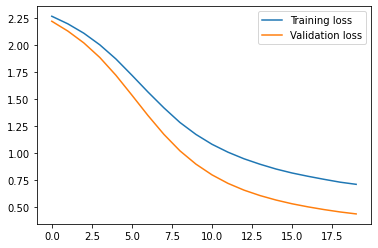

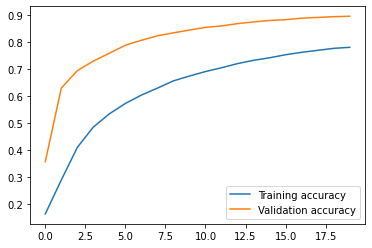

In [10]:
# Esta función pinta dos gráficas, una con la evolución
# de la función de pérdida en el conjunto de train y
# en el de validación, y otra con la evolución de la
# accuracy en el conjunto de train y el de validación.
# Es necesario pasarle como parámetro el historial del
# entrenamiento del modelo (lo que devuelven las
# funciones fit() y fit_generator()).
def mostrarEvolucion(hist):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    pyplot.plot(loss)
    pyplot.plot(val_loss)
    pyplot.legend(['Training loss', 'Validation loss'])
    pyplot.show()
    
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    pyplot.plot(acc)
    pyplot.plot(val_acc)
    pyplot.legend(['Training accuracy','Validation accuracy'])
    pyplot.show()


mostrarEvolucion(hist)

In [11]:
# APLICAMOS EL TEST
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.48519301414489746
Test accuracy: 0.8738999962806702


[[ 951    0    2    3    0    3   12    1    8    0]
 [   0 1106    2    4    1    1    6    0   15    0]
 [  16    8  870   17   11    0   36   25   44    5]
 [   3    7   22  893    0   17    7   22   28   11]
 [   2    6    4    0  844    0   28    2    8   88]
 [  23   11    7  102   33  635   25    2   45    9]
 [  18   17    8    2    9   17  882    1    4    0]
 [   1   25   36    4   13    0    2  882    7   58]
 [  15   27   10   35   15   18   12   21  803   18]
 [  15   14    7   12   41    5    1   35    6  873]]
Accuracy de nuestro modelo en test: 87.39%


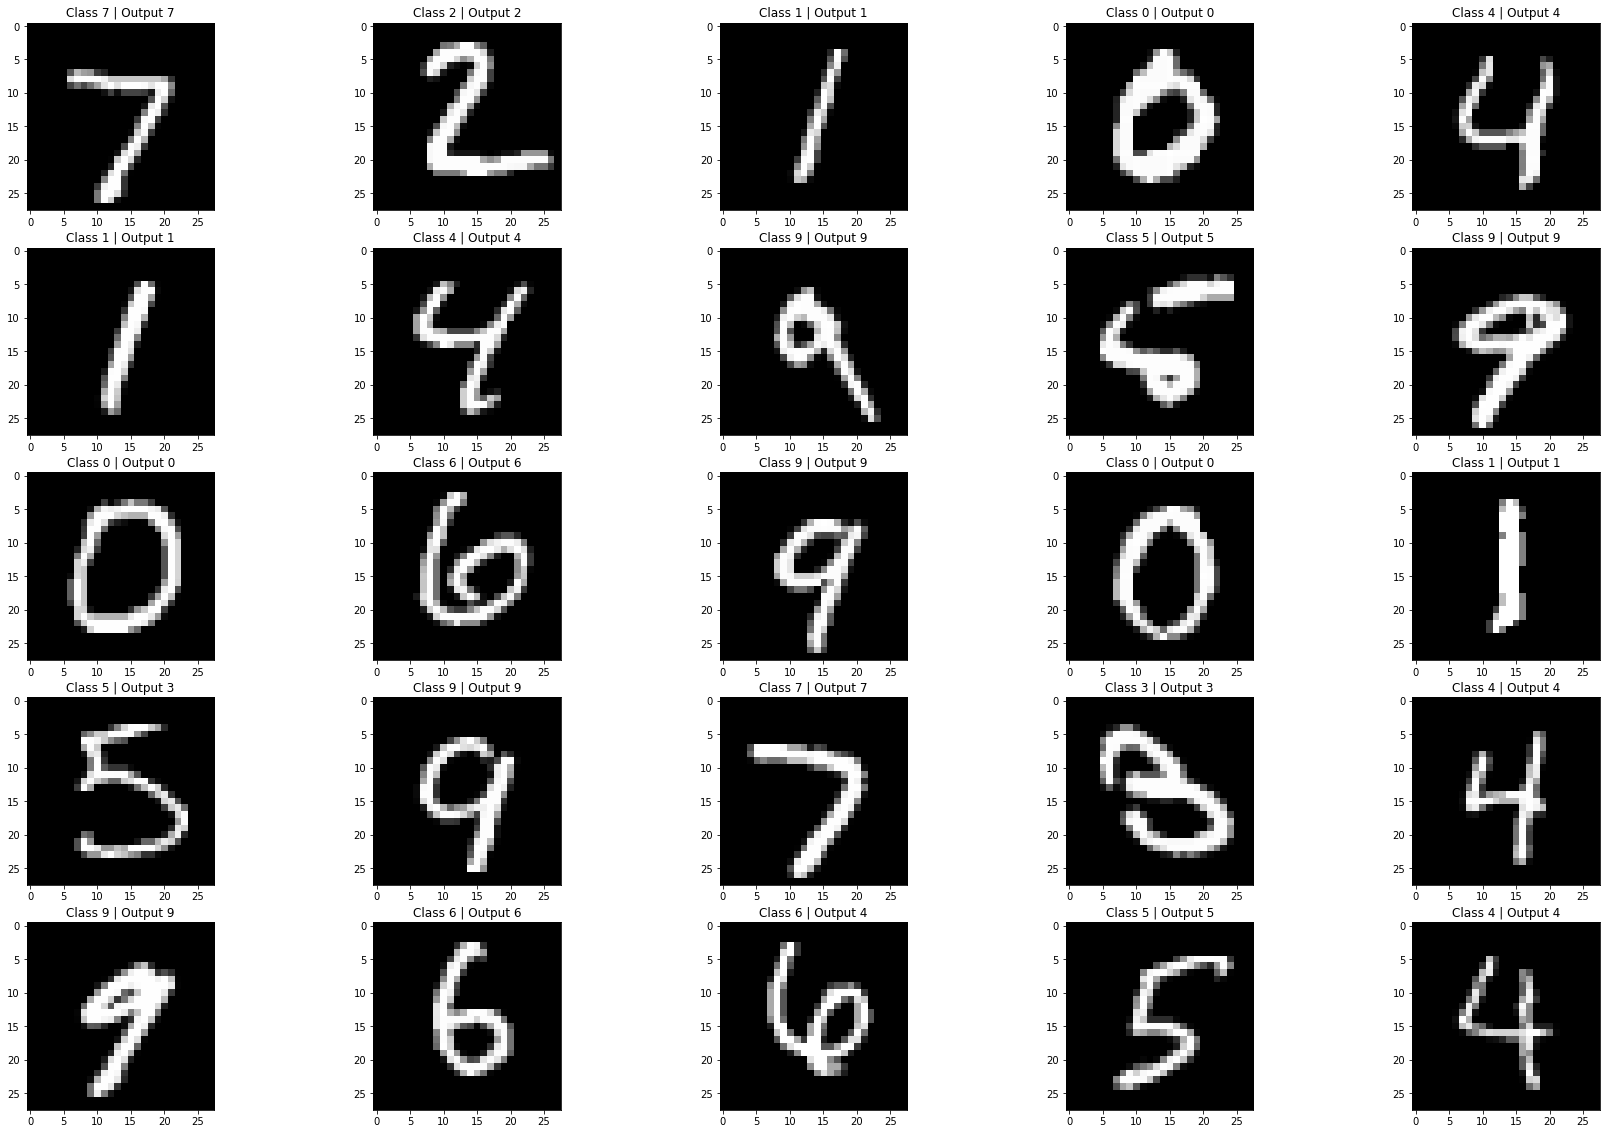

In [13]:
# VAMOS A VER CÓMO CLASIFICA ALGUNOS EJEMPLOS CONCRETOS
y_prob = model.predict(x_test) 
y_classes = np.argmax(y_prob,axis=1) #O y_prob.argmax(axis=1)

# MOSTRAMOS LA MATRIZ DE CONFUSIÓN
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_prob.argmax(axis=1))
print(matrix)

# Esta función devuelve la accuracy de un modelo, 
# definida como el porcentaje de etiquetas bien predichas
# frente al total de etiquetas. Como parámetros es
# necesario pasarle el vector de etiquetas verdaderas
# y el vector de etiquetas predichas, en el formato de
# keras (matrices donde cada etiqueta ocupa una fila,
# con un 1 en la posición de la clase a la que pertenece y un 0 en las demás).
def calcularAccuracy(labels, preds):
    labels = np.argmax(labels, axis = 1)
    preds = np.argmax(preds, axis = 1)
    accuracy = sum(labels == preds)/len(labels)
    return accuracy

print('Accuracy de nuestro modelo en test: {}%'.format(calcularAccuracy(y_prob, y_test)*100)) #Este valor coincide con score[1]

# VISUALIZAMOS ALGUNOS EJEMPLOS CONCRETOS
number_images_per_row = 5
result = np.where(y_test == 1)
fig = pyplot.figure()
for i in range(number_images_per_row*number_images_per_row):
  label = 'Class {} | Output {}'.format(result[1][i],y_classes[i])
  pyplot.subplot(number_images_per_row,number_images_per_row,i+1).set_title(label)
  pyplot.imshow(x_test[i].squeeze(), cmap='gray',vmin=0,vmax=1)

fig.set_size_inches(np.array(fig.get_size_inches()) * number_images_per_row)
pyplot.show()

In [14]:
# PROPORCIONAMOS TAMBIÉN ALGUNAS FUNCIONES AUXILIARES, EN CASO DE QUE PUEDAN SER
# DE INTERÉS O UTILIDAD PARA LOS ESTUDIANTES

#########################################################################
################## FUNCIÓN PARA LEER LAS IMÁGENES #######################
#########################################################################

# Dado un fichero train.txt o test.txt y el path donde se encuentran los
# ficheros y las imágenes, esta función lee las imágenes
# especificadas en ese fichero y devuelve las imágenes en un vector y 
# sus clases en otro.

def leerImagenes(vec_imagenes, path):
  clases = np.array([img.split('/')[0] for img in vec_imagenes])
  #print(clases)
  imagenes = np.array([img_to_array(load_img(path + "/" + img, 
                                             target_size = (224, 224))) 
                       for img in vec_imagenes])
  return imagenes, clases

#########################################################################
############# FUNCIÓN PARA CARGAR EL CONJUNTO DE DATOS ##################
#########################################################################

# Usando la función anterior, y dado el path donde se encuentran las
# imágenes y los archivos "train.txt" y "test.txt", devuelve las 
# imágenes y las clases de train y test para usarlas con keras
# directamente.

def cargarDatos(path):
  # Cargamos los ficheros
  #print('Cargamos los ficheros')
  train_images = np.loadtxt(path + "/train.txt", dtype = str)
  test_images = np.loadtxt(path + "/test.txt", dtype = str)
  
  # Leemos las imágenes con la función anterior
  #print('Antes de leer imagenes de train')
  train, train_clases = leerImagenes(train_images, path)
  #print('Despues de leer imagenes de train y antes de leer imagenes de test')
  test, test_clases = leerImagenes(test_images, path)
  #print('despues de leer imagenes de test')
  
  # Pasamos los vectores de las clases a matrices 
  # Para ello, primero pasamos las clases a números enteros
  clases_posibles = np.unique(np.copy(train_clases))
  for i in range(len(clases_posibles)):
    #print('{} of {}'.format(i, len(clases_posibles)))
    train_clases[train_clases == clases_posibles[i]] = i
    test_clases[test_clases == clases_posibles[i]] = i

  # Después, usamos la función to_categorical()
  train_clases = keras.utils.np_utils.to_categorical(train_clases, 200)
  test_clases = keras.utils.np_utils.to_categorical(test_clases, 200)
  
  # Barajar los datos
  train_perm = np.random.permutation(len(train))
  train = train[train_perm]
  train_clases = train_clases[train_perm]

  test_perm = np.random.permutation(len(test))
  test = test[test_perm]
  test_clases = test_clases[test_perm]
  
  return train, train_clases, test, test_clases

#########################################################################
######## FUNCIÓN PARA CARGAR Y MODIFICAR EL CONJUNTO DE DATOS ###########
#########################################################################

# A esta función solo se la llama una vez. Devuelve 4 
# vectores conteniendo, por este orden, las imágenes
# de entrenamiento, las clases de las imágenes de
# entrenamiento, las imágenes del conjunto de test y
# las clases del conjunto de test.
def cargarImagenes(visualizeFlag=False):
    # Cargamos Cifar100. Cada imagen tiene tamaño
    # (32 , 32, 3). Nos vamos a quedar con las
    # imágenes de 25 de las clases.
    (x_train, y_train), (x_test, y_test) = cifar100.load_data (label_mode ='fine')

    # summarize loaded dataset
    print('Summary original dataset: ')
    print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
    print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    train_idx = np.isin(y_train, np.arange(25))
    train_idx = np.reshape (train_idx, -1)
    x_train = x_train[train_idx]
    y_train = y_train[train_idx]
    test_idx = np.isin(y_test, np.arange(25))
    test_idx = np.reshape(test_idx, -1)
    x_test = x_test[test_idx]
    y_test = y_test[test_idx]

    # Transformamos los vectores de clases en matrices.
    # Cada componente se convierte en un vector de ceros
    # con un uno en la componente correspondiente a la
    # clase a la que pertenece la imagen. Este paso es
    # necesario para la clasificación multiclase en keras.
    y_train = keras.utils.np_utils.to_categorical(y_train, 25)
    y_test = keras.utils.np_utils.to_categorical(y_test, 25)

    if visualizeFlag:
      number_images_per_row = 3
      result = np.where(y_train == 1)
      fig = pyplot.figure()
      for i in range(number_images_per_row*number_images_per_row):
        # define subplot
        label = 'Class {}'.format(result[1][i])
        #print(result[1])
        #print(result[1][i])
        #print(label)
        pyplot.subplot(number_images_per_row,number_images_per_row,i+1).set_title(label)
        # plot raw pixel data
        pyplot.imshow(x_train[i])
      # show the figure
      fig.set_size_inches(np.array(fig.get_size_inches()) * number_images_per_row)
      pyplot.show()

    # summarize loaded dataset
    print('Summary reduced dataset: ')
    print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
    print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
    
    return x_train , y_train , x_test , y_test

